In [8]:
from langdetect import detect, LangDetectException
import json
import pandas as pd

In [3]:
fJsonName_youtube = 'NEW_youtube_olympics_data_limited_250_per_hashtag.json'
with open(fJsonName_youtube, 'r') as f:
    ySubmissions = json.load(f)

language = {}

for sub in ySubmissions:
    try:
        title_language = detect(sub['Video Title']) 
        description_language = detect(sub['Description']) 

        if title_language:
            if title_language in language:
                language[title_language] += 1
            else:
                language[title_language] = 1

        if description_language:
            if description_language in language:
                language[description_language] += 1
            else:
                language[description_language] = 1

        # Iterate through comments and count detected comment languages
        for com in sub.get('Comments', []):
            comment_text = com.get('text', '')
            if comment_text:
                try:
                    # Detect the language of the comment
                    comment_language = detect(comment_text)

                    # Increment count for detected comment language
                    if comment_language in language:
                        language[comment_language] += 1
                    else:
                        language[comment_language] = 1
                except LangDetectException:
                    continue
    except LangDetectException:
        continue

In [19]:
language_code_to_name = {
    'ar': 'Arabic',
    'cs': 'Czech',
    'da': 'Danish',
    'en': 'English',
    'et': 'Estonian',
    'fi': 'Finnish',
    'fr': 'French',
    'de': 'German',
    'el': 'Greek',
    'he': 'Hebrew',
    'hu': 'Hungarian',
    'it': 'Italian',
    'lv': 'Latvian',
    'lt': 'Lithuanian',
    'no': 'Norwegian',
    'fa': 'Persian',
    'pl': 'Polish',
    'pt': 'Portuguese',
    'ro': 'Romanian',
    'ru': 'Russian',
    'sk': 'Slovak',
    'es': 'Spanish',
    'sv': 'Swedish',
    'tr': 'Turkish',
    'ca': 'Catalan',
    'sw': 'Swahili',
    'nl': 'Dutch',
    'vi': 'Vietnamese',
    'sq': 'Albanian',
    'so': 'Somali',
    'id': 'Indonesian',
    'tl': 'Tagalog',
    'af': 'Afrikaans',
    'hr': 'Croatian',
    'cy': 'Welsh',
    'ko': 'Korean',
    'ja': 'Japanese',
    'zh-cn': 'Chinese (Simplified)',
    'zh-tw': 'Chinese (Traditional)',
    'hi': 'Hindi',
    'mk': 'Macedonian',
    'bg': 'Bulgarian',
    'uk': 'Ukrainian',
    'lv': 'Latvian',
    'mr': 'Marathi',
    'sk': 'Slovak',
    'hu': 'Hungarian',
    'th': 'Thai',
    'ne': 'Nepali',
    'te': 'Telugu',
    'kn': 'Kannada',
    'ml': 'Malayalam',
    'ta': 'Tamil',
    'bn': 'Bengali',
    'pa': 'Punjabi',
    'gu': 'Gujarati',
    'ur': 'Urdu',
    'sl': 'Slovenian'
}


# Convert language codes to language names 
language_name = {}
for code, count in language.items():
    name = language_code_to_name.get(code, code)
    language_name[name] = count

language_name = dict(sorted(language_name.items(), key=lambda item: item[1], reverse = True))
language_name

{'English': 226253,
 'Indonesian': 15794,
 'Portuguese': 12056,
 'French': 11366,
 'Russian': 11306,
 'Spanish': 11024,
 'Japanese': 9503,
 'Somali': 7144,
 'Korean': 6861,
 'Tagalog': 6455,
 'Italian': 5817,
 'German': 5701,
 'Swahili': 4894,
 'Polish': 3484,
 'Afrikaans': 3413,
 'Dutch': 3258,
 'Chinese (Simplified)': 2927,
 'Turkish': 2590,
 'Estonian': 2483,
 'Vietnamese': 2369,
 'Romanian': 2314,
 'Catalan': 2295,
 'Norwegian': 2258,
 'Welsh': 2227,
 'Croatian': 1882,
 'Finnish': 1661,
 'Hindi': 1614,
 'Danish': 1539,
 'Slovenian': 1484,
 'Slovak': 1285,
 'Thai': 1219,
 'Arabic': 1142,
 'Bulgarian': 1078,
 'Hungarian': 1016,
 'Swedish': 994,
 'Lithuanian': 979,
 'Macedonian': 912,
 'Chinese (Traditional)': 892,
 'Albanian': 831,
 'Czech': 741,
 'Ukrainian': 621,
 'Persian': 398,
 'Latvian': 305,
 'Marathi': 203,
 'Malayalam': 196,
 'Nepali': 163,
 'Tamil': 162,
 'Greek': 129,
 'Bengali': 94,
 'Hebrew': 52,
 'Urdu': 42,
 'Telugu': 42,
 'Kannada': 35,
 'Punjabi': 19,
 'Gujarati': 6}

In [34]:
language_name_df = pd.DataFrame(list(language_name.items()), columns=['Language', 'Count'])
language_name_df

,Language,Count
0,English,226253
1,Indonesian,15794
2,Portuguese,12056
3,French,11366
4,Russian,11306
5,Spanish,11024
6,Japanese,9503
7,Somali,7144
8,Korean,6861
9,Tagalog,6455


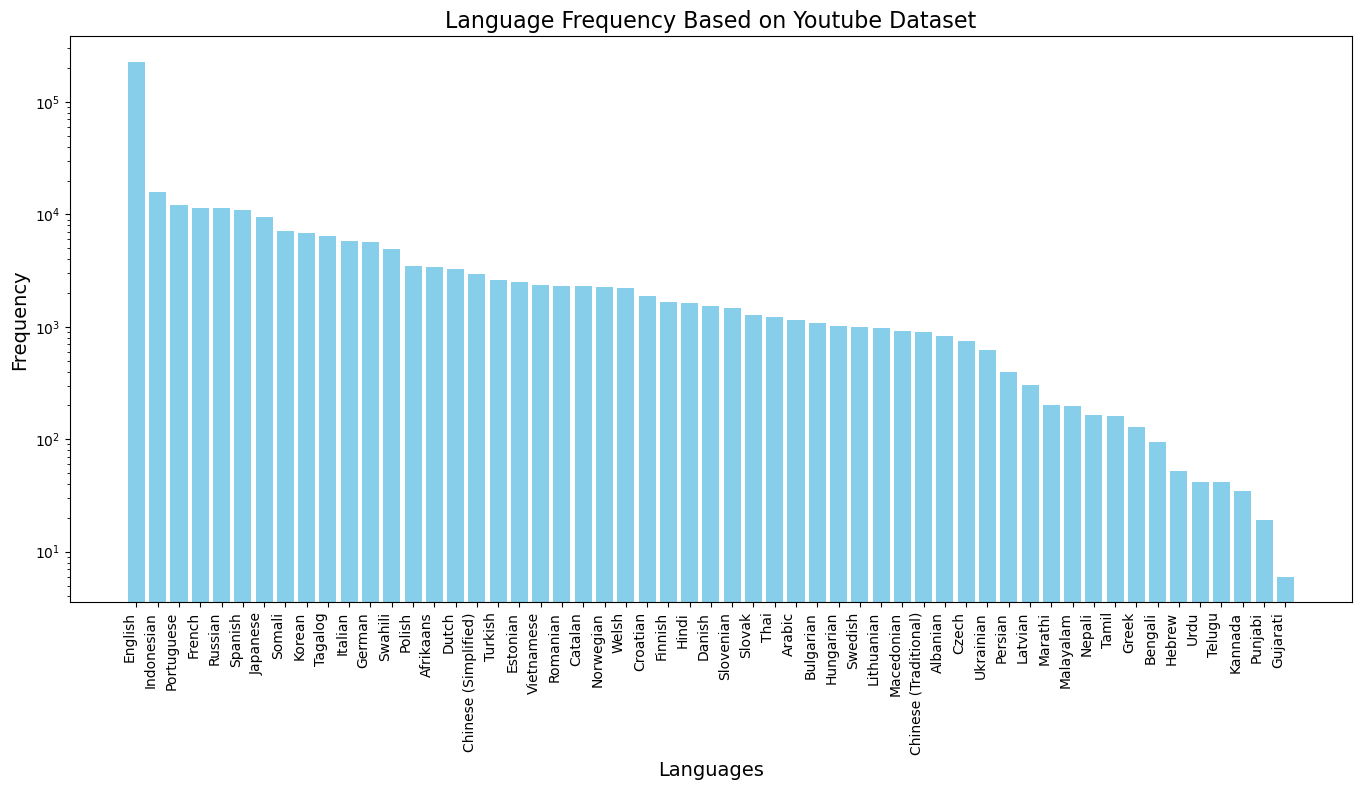

In [45]:
import matplotlib.pyplot as plt

languages = list(language_name.keys())
counts = list(language_name.values())

plt.figure(figsize=(14, 8))  
plt.bar(languages, counts, color='skyblue') 

plt.xlabel('Languages', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Language Frequency Based on Youtube Dataset', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  
plt.yscale('log')

plt.show()

In [38]:
import geopandas as gpd

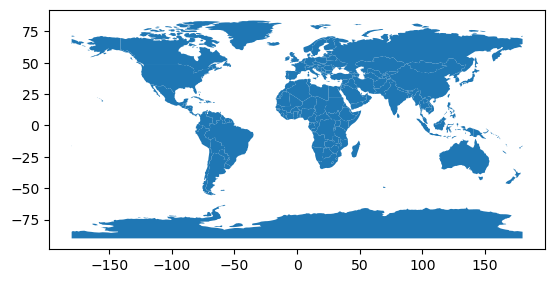

In [39]:
world = gpd.read_file('/Users/Chelsea/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Plot the world map
world.plot()
plt.show()

In [41]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


/var/folders/lq/wst6txn15xb88w382y5y1th40000gn/T/ipykernel_19739/4219492773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Count', data=language_name_df, palette='pastel')


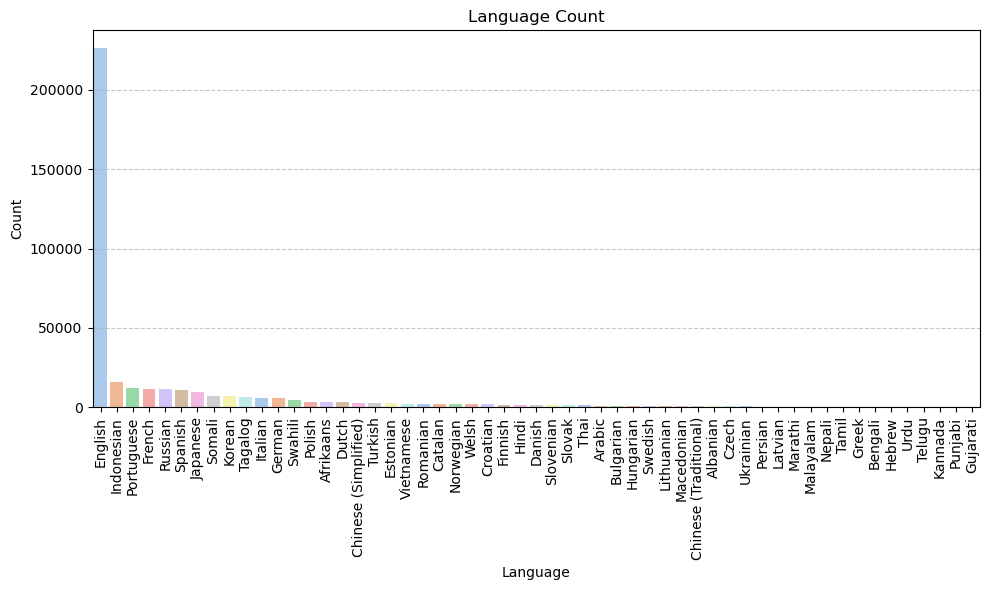

In [52]:
import seaborn as sns

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='Count', data=language_name_df, palette='pastel')
plt.title('Language Count')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')
plt.tight_layout()
plt.show()